In [1]:
import pandas as pd
import numpy as np


# EDA

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,Score,Text
0,5,I received this product early from the seller!...
1,5,*****<br />Numi's Collection Assortment Melang...
2,5,"I was very careful not to overcook this pasta,..."
3,5,Buying this multi-pack I was misled by the pic...
4,5,These bars are so good! I loved them warmed up...


In [4]:
print(train.columns)
print(train["Score"].value_counts())

Index(['Score', 'Text'], dtype='object')
Score
5    197151
4     43876
1     28521
3     23296
2     16287
Name: count, dtype: int64


In [5]:
valid_score = {1, 2, 3, 4, 5}
unique_score = set(train["Score"].unique())

# Find invalid sentiment labels
invalid_score = unique_score - valid_score

if invalid_score:
    print("Unexpected score labels found:", invalid_score)
    invalid_rows = train[train["Score"].isin(invalid_score)]
    print(invalid_rows)
else:
    print("All sentiments are correctly labeled.")

All sentiments are correctly labeled.


In [6]:
train.describe()

,Score
count,309131.000000
mean,4.180241
std,1.312151
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


C:\Users\Athin Suresh\AppData\Local\Temp\ipykernel_4412\1363575255.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train["Score"], palette="viridis")


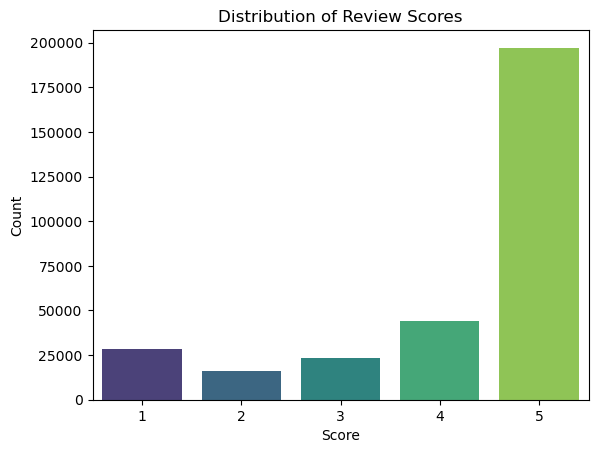

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=train["Score"], palette="viridis")
plt.title("Distribution of Review Scores")
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()


In [8]:
train['length']=train['Text'].apply(len)
train.head()

,Score,Text,length
0,5,I received this product early from the seller!...,197
1,5,*****<br />Numi's Collection Assortment Melang...,1938
2,5,"I was very careful not to overcook this pasta,...",1084
3,5,Buying this multi-pack I was misled by the pic...,186
4,5,These bars are so good! I loved them warmed up...,155


C:\Users\Athin Suresh\AppData\Local\Temp\ipykernel_4412\1063189245.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train["Score"], y=train["length"], palette="viridis")


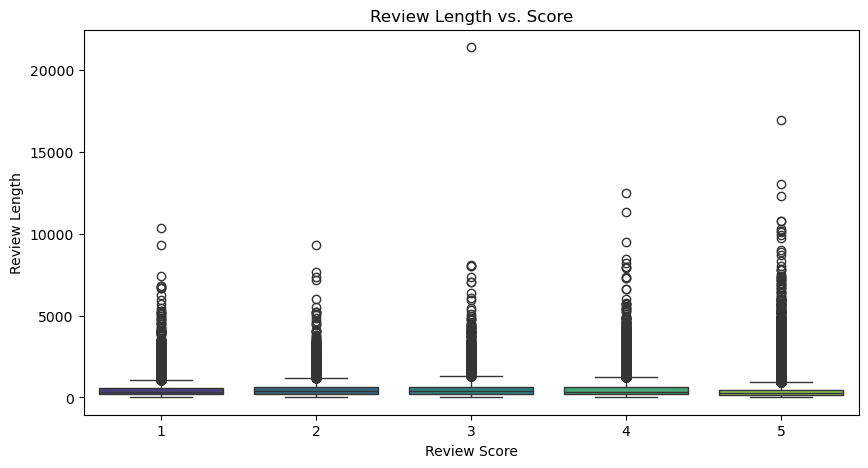

In [9]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.boxplot(x=train["Score"], y=train["length"], palette="viridis")
plt.title("Review Length vs. Score")
plt.xlabel("Review Score")
plt.ylabel("Review Length")
plt.show()

In [10]:
train[["Score", "length"]].corr()

,Score,length
Score,1.000000,-0.068981
length,-0.068981,1.000000


In [11]:
train.head()


,Score,Text,length
0,5,I received this product early from the seller!...,197
1,5,*****<br />Numi's Collection Assortment Melang...,1938
2,5,"I was very careful not to overcook this pasta,...",1084
3,5,Buying this multi-pack I was misled by the pic...,186
4,5,These bars are so good! I loved them warmed up...,155


In [12]:
test = pd.read_csv('test.csv')
test.head()

,Id,Text
0,0,Fog chaser was the best both in flavor and bod...
1,1,"We found this at PF Changs, and it tastes just..."
2,2,Not quite a chocolate bar substitute but delic...
3,3,This is not as tasty as Pamela's Almond Biscot...
4,4,"<a href=""http://www.amazon.com/gp/product/B000..."


# Topic Modelling

## Text Processing

In [13]:
one_star_df = train[train["Score"] == 1]
five_star_df = train[train["Score"] == 5]

# Sample 20,000 reviews from each subset
one_star_sampled = one_star_df.sample(n=20000, random_state=42)  # Use random_state for reproducibility
five_star_sampled = five_star_df.sample(n=20000, random_state=42)

In [14]:
print("One-star sample size:", one_star_sampled.shape[0])
print("Five-star sample size:", five_star_sampled.shape[0])

One-star sample size: 20000
Five-star sample size: 20000


In [15]:
one_star_sampled.head()

,Score,Text,length
137270,1,"I'm sorry, but these are horrible! They taste...",314
184706,1,"Look at the ingredients: water, wheat, salt, ...",193
25238,1,That's right I thought that price was for a Ca...,151
37407,1,have bought this product on two different occa...,221
113937,1,"These walnuts were ""SO GROSS"", they tasted ran...",207


In [16]:
import string
one_star_sampled['Text'] = one_star_sampled['Text'].str.translate(str.maketrans('', '', string.punctuation))
five_star_sampled['Text'] = five_star_sampled['Text'].str.translate(str.maketrans('', '', string.punctuation))

In [17]:
one_star_sampled['Text'] = one_star_sampled['Text'].str.replace(r'\d+', '', regex=True)
five_star_sampled['Text'] = five_star_sampled['Text'].str.replace(r'\d+', '', regex=True)


In [18]:
import nltk
from nltk.corpus import stopwords
import contractions

nltk.download('stopwords') #make sure the stopwords are downloaded.

def expand_and_remove_stopwords(text):
    expanded_text = contractions.fix(text) #expands the contractions
    stop_words = set(stopwords.words('english'))
    words = expanded_text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words] #make sure words are lower case for comparison.
    return ' '.join(filtered_words)

one_star_sampled['Text'] = one_star_sampled['Text'].apply(expand_and_remove_stopwords)
five_star_sampled['Text'] = five_star_sampled['Text'].apply(expand_and_remove_stopwords)
one_star_sampled.head()
five_star_sampled.head()

[nltk_data] Downloading package stopwords to C:\Users\Athin
[nltk_data]     Suresh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Score,Text,length
115121,5,ALMOST GOOD FRESH SURE SEARCH AROUND GOOD BUTT...,206
259983,5,multiple trials various dry dog foods one food...,445
304052,5,searched ages drink watersoda water various sw...,505
104143,5,anxiously awaiting flavor coffee YUM YUM YUM r...,258
39184,5,never hold box house day kids devour soon goes...,225


In [19]:
one_star_sampled.head()

,Score,Text,length
137270,1,sorry horrible taste burnt bitter neither husb...,314
184706,1,Look ingredients water wheat salt sugar soy in...,193
25238,1,right thought price Case sixbr beyond Greed In...,151
37407,1,bought product two different occasion times ar...,221
113937,1,walnuts GROSS tasted rancid threw garbage hone...,207


In [20]:
nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize
one_star_sampled['TextTokens'] = one_star_sampled['Text'].apply(word_tokenize)
five_star_sampled['TextTokens'] = five_star_sampled['Text'].apply(word_tokenize)


[nltk_data] Downloading package punkt_tab to C:\Users\Athin
[nltk_data]     Suresh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [21]:
one_star_sampled.head()

,Score,Text,length,TextTokens
137270,1,sorry horrible taste burnt bitter neither husb...,314,"[sorry, horrible, taste, burnt, bitter, neithe..."
184706,1,Look ingredients water wheat salt sugar soy in...,193,"[Look, ingredients, water, wheat, salt, sugar,..."
25238,1,right thought price Case sixbr beyond Greed In...,151,"[right, thought, price, Case, sixbr, beyond, G..."
37407,1,bought product two different occasion times ar...,221,"[bought, product, two, different, occasion, ti..."
113937,1,walnuts GROSS tasted rancid threw garbage hone...,207,"[walnuts, GROSS, tasted, rancid, threw, garbag..."


In [23]:
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
one_star_sampled['TextTokens'] = one_star_sampled['TextTokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
five_star_sampled['TextTokens'] = five_star_sampled['TextTokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

[nltk_data] Downloading package wordnet to C:\Users\Athin
[nltk_data]     Suresh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [24]:
one_star_sampled.head()

,Score,Text,length,TextTokens
137270,1,sorry horrible taste burnt bitter neither husb...,314,"[sorry, horrible, taste, burnt, bitter, neithe..."
184706,1,Look ingredients water wheat salt sugar soy in...,193,"[Look, ingredient, water, wheat, salt, sugar, ..."
25238,1,right thought price Case sixbr beyond Greed In...,151,"[right, thought, price, Case, sixbr, beyond, G..."
37407,1,bought product two different occasion times ar...,221,"[bought, product, two, different, occasion, ti..."
113937,1,walnuts GROSS tasted rancid threw garbage hone...,207,"[walnut, GROSS, tasted, rancid, threw, garbage..."


## One-star rating

In [25]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Load dataset
X_one_star = one_star_sampled['Text']

# Convert text to a document-term matrix
vectorizer = CountVectorizer(max_df=0.15, min_df=2, stop_words='english', max_features=5000)
X_dtm = vectorizer.fit_transform(X_one_star)

In [26]:
lda15 = LatentDirichletAllocation(n_components=15, random_state=42) 
lda15.fit(X_dtm)
# Get feature names (words)
words = np.array(vectorizer.get_feature_names_out())

In [27]:
# Display top words in each topic
def display_topics(model, feature_names, num_words=10):
    sorting = np.argsort(model.components_, axis=1)[:, ::-1]  # Recompute sorting for the current model
    for topic_idx, topic in enumerate(model.components_):
        top_words = feature_names[sorting[topic_idx]][:num_words]
        print(f"\n🔹 Topic {topic_idx+1}:")
        print(", ".join(top_words))

display_topics(lda15, words, num_words=10)


🔹 Topic 1:
water, milk, flavor, drink, coconut, bottle, fat, new, better, tastes

🔹 Topic 2:
coffee, cup, flavor, kcups, beans, pods, cups, machine, tried, vanilla

🔹 Topic 3:
chocolate, sugar, cookies, sweet, bars, bar, hot, artificial, cookie, cocoa

🔹 Topic 4:
organic, hair, formula, gum, use, baby, licorice, products, used, best

🔹 Topic 5:
ingredients, corn, syrup, sugar, ingredient, natural, list, contains, products, label

🔹 Topic 6:
amazon, price, order, store, item, ordered, shipping, received, local, oz

🔹 Topic 7:
bad, smell, got, time, bought, try, really, tasted, batch, opened

🔹 Topic 8:
food, cat, dog, cats, eat, dogs, meat, chicken, foods, pet

🔹 Topic 9:
dog, treats, dogs, china, treat, chicken, small, products, chew, pieces

🔹 Topic 10:
tea, green, flavor, teas, tastes, lemon, love, tried, drink, bags

🔹 Topic 11:
money, waste, soup, flavor, bought, tasted, away, really, tried, chicken

🔹 Topic 12:
box, ordered, received, arrived, amazon, order, package, opened, bag,

In [28]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [29]:
from __future__ import print_function  # Ensures Python 2/3 compatibility (not needed in Python 3).
import pyLDAvis
import pyLDAvis.lda_model  # Importing LDA visualization module.
pyLDAvis.enable_notebook()  # Enables inline visualization in Jupyter Notebook.


In [30]:
pyLDAvis.lda_model.prepare(lda15, X_dtm, vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.151826 -0.112111       1        1  11.612609
11    -0.118531 -0.166289       2        1   9.603600
7     -0.111851  0.005013       3        1   8.429446
1      0.113844 -0.052024       4        1   7.427652
6      0.024849 -0.133474       5        1   7.414918
14     0.096421 -0.028722       6        1   6.961906
10     0.127575 -0.030212       7        1   6.614173
12     0.047424  0.093087       8        1   6.178731
4     -0.196485  0.222701       9        1   6.078598
0      0.073299  0.111395      10        1   5.835309
8     -0.164314 -0.068400      11        1   5.223058
9      0.142754  0.001117      12        1   5.161685
2      0.129577  0.080696      13        1   4.543799
3     -0.108358  0.090055      14        1   4.521351
13     0.095622 -0.012832      15        1   4.393165, topic_info=           Term         Freq        Total Category  logprob  loglift
849      coffee  4243.000000  4243.000000  Default  30.0000  30.0000
4460        tea  3101.000000  3101.000000  Default  29.0000  29.0000
769   chocolate  1856.000000  1856.000000  Default  28.0000  28.0000
1719       food  3929.000000  3929.000000  Default  27.0000  27.0000
1317        dog  2013.000000  2013.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
4044      small   134.547421  1091.596080  Topic15  -5.2644   1.0316
2799        mix   115.695238   963.867314  Topic15  -5.4153   1.0051
4894      white   107.613873   618.931708  Topic15  -5.4877   1.3757
4627      tried   119.410741  2723.404358  Topic15  -5.3837  -0.0019
2632       make   105.787522  2000.056148  Topic15  -5.5049   0.1856

[1078 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
9         8  0.960557   acai
19        4  0.188824   acid
19        8  0.042753   acid
19        9  0.684042   acid
19       10  0.053441   acid
...     ...       ...    ...
4994     13  0.021059   zero
4994     14  0.017549   zero
4995      8  0.969287  zevia
4996      8  0.990769   zico
4999     11  0.940325  zukes

[4010 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 12, 8, 2, 7, 15, 11, 13, 5, 1, 9, 10, 3, 4, 14])

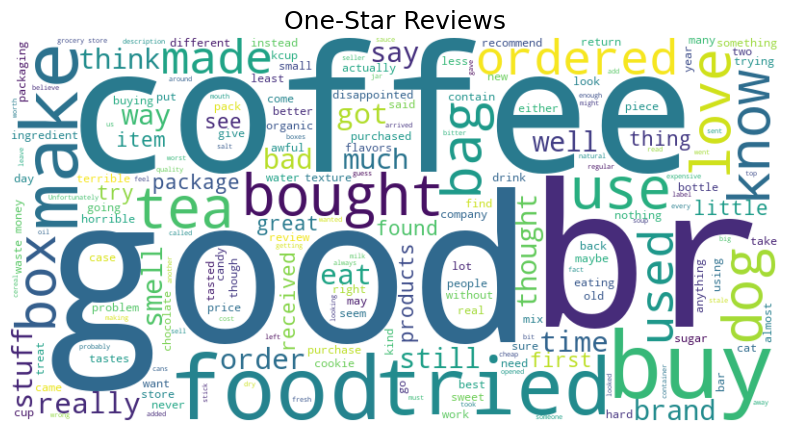

In [33]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all preprocessed one-star reviews into one string
one_star_text = " ".join(one_star_sampled["Text"].astype(str))

# Define stopwords (optional – extend as needed)
stopwords = set(STOPWORDS)
stopwords.update(["product", "amazon", "would", "get", "one", "even", "taste", "flavor"])  # Optional: add more

# Generate word cloud
one_star_wc = WordCloud(
    stopwords=stopwords,
    background_color="white",
    max_words=200,
    width=800,
    height=400
).generate(one_star_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(one_star_wc, interpolation='bilinear')
plt.title("One-Star Reviews", fontsize=18)
plt.axis('off')
plt.show()


## Five star rating

In [34]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Load dataset
X_five_star = five_star_sampled['Text']

# Convert text to a document-term matrix
vectorizer = CountVectorizer(max_df=0.15, min_df=2, stop_words='english', max_features=5000)
X_dtm = vectorizer.fit_transform(X_five_star)

In [35]:
# Apply LDA for topic modeling 
lda15 = LatentDirichletAllocation(n_components=15, random_state=42) 
lda15.fit(X_dtm)
# Get feature names (words)
words = np.array(vectorizer.get_feature_names_out())

In [36]:
# Display top words in each topic
def display_topics(model, feature_names, num_words=10):
    sorting = np.argsort(model.components_, axis=1)[:, ::-1]  # Recompute sorting for the current model
    for topic_idx, topic in enumerate(model.components_):
        top_words = feature_names[sorting[topic_idx]][:num_words]
        print(f"\n🔹 Topic {topic_idx+1}:")
        print(", ".join(top_words))

display_topics(lda15, words, num_words=10)


🔹 Topic 1:
sweet, cereal, snack, sugar, eat, cookies, low, breakfast, healthy, ginger

🔹 Topic 2:
rice, fresh, bag, use, price, amazon, store, bags, time, buy

🔹 Topic 3:
amazon, price, order, buy, time, store, bought, ordered, shipping, best

🔹 Topic 4:
tea, green, teas, drink, cup, hot, best, iced, bags, black

🔹 Topic 5:
honey, weight, day, wine, diet, know, really, need, blood, work

🔹 Topic 6:
butter, peanut, nuts, really, seeds, eat, fat, snack, apple, little

🔹 Topic 7:
organic, baby, candy, day, time, formula, milk, used, taking, days

🔹 Topic 8:
food, dog, dogs, treats, loves, eat, old, treat, little, dry

🔹 Topic 9:
use, sauce, make, mix, add, bread, chicken, pasta, used, hot

🔹 Topic 10:
coffee, cup, strong, roast, tried, beans, best, blend, smooth, bold

🔹 Topic 11:
chocolate, bars, gluten, free, bar, best, dark, protein, cake, mix

🔹 Topic 12:
sugar, syrup, sweet, better, gum, flavors, natural, organic, artificial, best

🔹 Topic 13:
water, drink, coconut, use, milk, oil, 

In [37]:
pyLDAvis.lda_model.prepare(lda15, X_dtm, vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.123402 -0.099158       1        1  12.465190
8     -0.073020 -0.022038       2        1  10.181192
7      0.141415  0.114456       3        1   8.882703
12    -0.029161 -0.013577       4        1   7.662631
9     -0.053512 -0.188157       5        1   7.510454
3     -0.082730 -0.151355       6        1   6.610843
1      0.068619 -0.089000       7        1   6.537164
0     -0.130024  0.124499       8        1   5.974368
13     0.001238 -0.015206       9        1   5.876027
11    -0.120216  0.011024      10        1   5.832138
10    -0.114554  0.078094      11        1   5.447782
6      0.130139  0.082138      12        1   4.912222
14     0.182207  0.011139      13        1   4.600407
5     -0.110505  0.108125      14        1   3.962518
4      0.066701  0.049018      15        1   3.544361, topic_info=           Term         Freq        Total Category  logprob  loglift
4438        tea  4730.000000  4730.000000  Default  30.0000  30.0000
855      coffee  4374.000000  4374.000000  Default  29.0000  29.0000
773   chocolate  1949.000000  1949.000000  Default  28.0000  28.0000
1703       food  3572.000000  3572.000000  Default  27.0000  27.0000
1304        dog  1660.000000  1660.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
4722        use   107.605432  3205.730791  Topic15  -5.1682  -0.0544
371      better    90.895972  2168.951939  Topic15  -5.3370   0.1675
4728      using    77.127166  1091.927465  Topic15  -5.5012   0.6896
4843        way    77.687923  1494.066675  Topic15  -5.4940   0.3833
4724       used    72.120971  1930.745623  Topic15  -5.5684   0.0525

[1099 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
8        10  0.961081    acai
12        6  0.130738  access
12       13  0.828009  access
21        4  0.045443    acid
21        5  0.302957    acid
...     ...       ...     ...
4980     15  0.966604      ys
4990     10  0.970100   zevia
4991      4  0.982850    zico
4992     12  0.952639    zinc
4999      3  0.961521   zukes

[3871 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 9, 8, 13, 10, 4, 2, 1, 14, 12, 11, 7, 15, 6, 5])

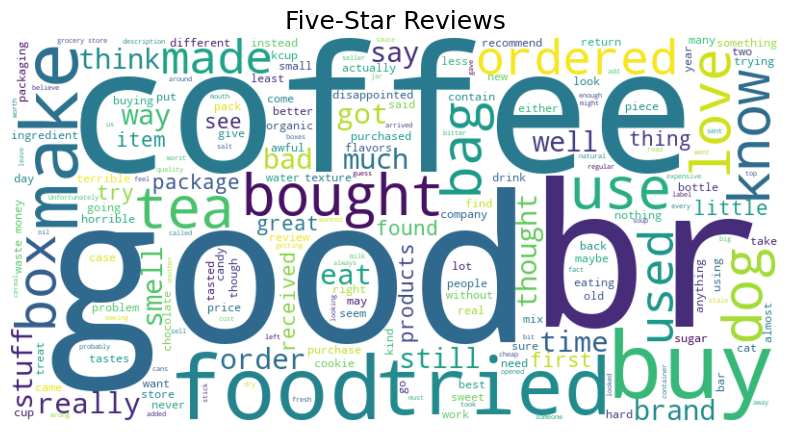

In [38]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all preprocessed one-star reviews into one string
five_star_text = " ".join(five_star_sampled["Text"].astype(str))

# Define stopwords (optional – extend as needed)
stopwords = set(STOPWORDS)
stopwords.update(["product", "amazon", "would", "get", "one", "even", "taste", "flavor"])  # Optional: add more

# Generate word cloud
five_star_wc = WordCloud(
    stopwords=stopwords,
    background_color="white",
    max_words=200,
    width=800,
    height=400
).generate(one_star_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(one_star_wc, interpolation='bilinear')
plt.title("Five-Star Reviews", fontsize=18)
plt.axis('off')
plt.show()
